## 1. Exploratory Data Analysis for BreastMNIST
This notebook performs a full exploratory data analysis (EDA) on the **BreastMNIST** dataset from MedMNIST.

We will inspect dataset structure, visualize images, analyze pixel statistics, and understand class balance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (6, 4)

## 2. Load Dataset

In [2]:
data = np.load("retinamnist_128.npz")

x_train = data["train_images"]
y_train = data["train_labels"].flatten()
x_val   = data["val_images"]
y_val   = data["val_labels"].flatten()
x_test  = data["test_images"]
y_test  = data["test_labels"].flatten()

# Combine all labels to check number of unique classes
all_labels = np.concatenate([y_train, y_val, y_test])
num_classes = len(np.unique(all_labels))

print(f"Number of train images: {len(x_train)}")
print(f"Number of val images: {len(x_val)}")
print(f"Number of test images: {len(x_test)}")
print(f"Number of classes: {num_classes}")
print(f"Image size: {x_train[0].shape}")

Number of train images: 1080
Number of val images: 120
Number of test images: 400
Number of classes: 5
Image size: (128, 128, 3)


## 3. Convert numeric labels to text (benign / malignant)

In [3]:
label_map = {0: "No DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferative"}
y_train_str = np.array([label_map[y] for y in y_train])
y_val_str   = np.array([label_map[y] for y in y_val])
y_test_str  = np.array([label_map[y] for y in y_test])

## 4. Visualize sample images

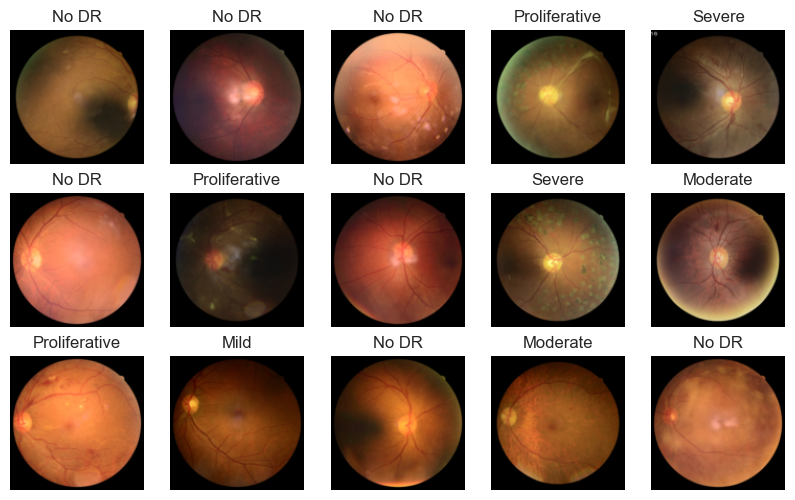

In [4]:
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(f"{y_train_str[i]}")
    ax.axis("off")
plt.show()

## 5. Class distribution

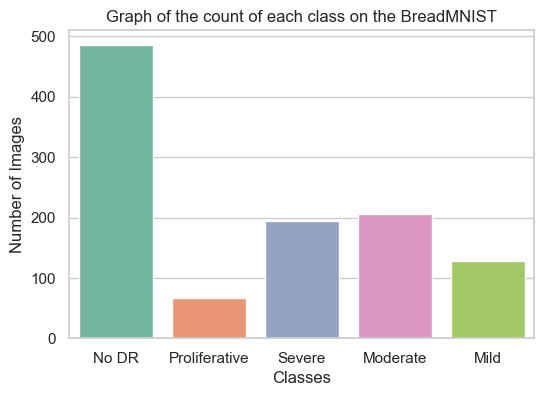

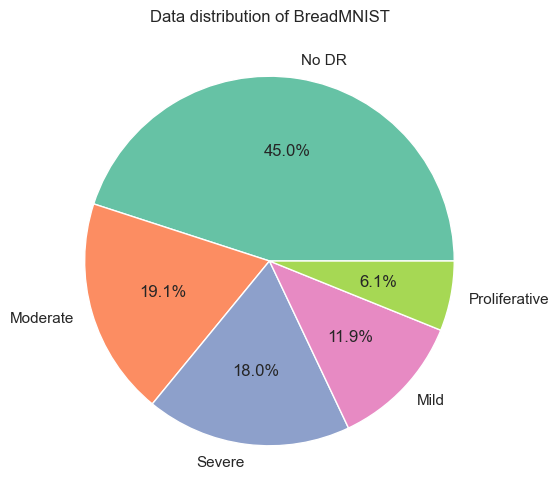

In [5]:
train_df = pd.DataFrame({"label": y_train_str})

sns.countplot(x="label", data=train_df, palette="Set2", hue="label", legend=False)
plt.title("Graph of the count of each class on the BreadMNIST")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(6, 6))
class_counts = train_df["label"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Data distribution of BreadMNIST")
plt.show()